##### **Load the Datasets**

In [1]:
import pandas as pd

#data1 = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/marksheet.csv', encoding='utf-8')
data = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/insurance.csv', encoding='utf-8')

In [2]:
# dataset-1
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


##### **Preprocess Dataset**

**Convert Categorical Fields to Numerical**: In our dataset we have fields `sex`, `smoker` and `region` which has non-numeric value. We have to convert them to numerical.

In [3]:
data['sex']    = pd.Categorical(data["sex"]).codes
data['smoker'] = pd.Categorical(data["smoker"]).codes
data['region'] = pd.Categorical(data["region"]).codes

In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


**Check if there any `null` values**

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

`there is no null values in our dataset`

##### **Understanding MLR and Linked to Dataset**
* **[Equation of Linear Line: `y = mx + c`]**
* In the simple linear regression we had one training feature `x` (coresponding with one co-eficient `m`). But in Multiple Linear Regression, we have several training features `x1, x2, x3, ..., xn`, so they will have several co-eficients `m1, m2, m3, ..., mn`.
* **Hence, the equation will be**: *`y = m1x1 + m2x2 + m3x3 + ... + mnxn + c`*
* In our dataset-1, we can consider `attendance`, `class_test` and `mid_term` as the training features and `final` as label. Similarly, in dataset-2, the training features would be `age`, `sex`, `bmi`, `children`, `smoker`, `region` and `charges` would the the label.

##### **Setup `X` and `Y`**

In [6]:
x = data.drop(columns="charges")      # It selects all the columns except `charges`
y = data['charges']

In [8]:
x.head(10)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
5,31,0,25.740,0,0,2
6,46,0,33.440,1,0,2
7,37,0,27.740,3,0,1
8,37,1,29.830,2,0,0
9,60,0,25.840,0,0,1


In [10]:
y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

**See Relationship among Data**

Text(0, 0.5, 'charges')

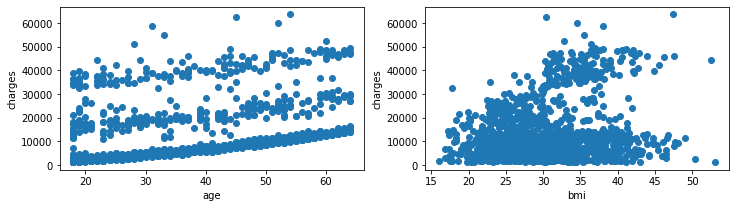

In [42]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))

# Scatter and Plot for 'attendance' vs 'final'
axs[0].scatter(x['age'], y)
axs[0].set_xlabel('age')
axs[0].set_ylabel('charges')

axs[1].scatter(x['bmi'],y)
axs[1].set_xlabel('bmi')
axs[1].set_ylabel('charges')


**Split Dataset into Train-Test**

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [9]:
print(f"X_Train: {len(x_train)}")
print(f"X_Test : {len(x_test)}")

X_Train: 1070
X_Test : 268


**Load Linear Regression Model and Fit to our Dataset**

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Check the Coeficient and Intercept**

In [15]:
m = lr.coef_
c = lr.intercept_
print("Coefficients:", m)
print("Intercept   :", c)

Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
Intercept   : -11661.983908824413


**Our Regression Equation**

Since we have six training features- 
> Equation would be: `y = m1x1+m2x2+m3x3+m4x4+m5x5+m6x6 + c`

Now we have `m` and `c`, and we can calculate `y` for any `x` using the linear_line equation.

##### **Predict**

**Check the Training Set**

In [23]:
y_pred_train = lr.predict(x_train)
print(f"Y_Actual:{y_train[:5].values.flatten()}")
print(f"Y_Pred  :{y_pred_train[:5].flatten()}")

Y_Actual:[40182.246    1137.4697  38511.6283   4670.64    13019.16105]
Y_Pred  :[33388.19026849  3615.42984257 30678.69073769  8023.13581024
 14151.87560616]


*Check the Relationship*

Text(0, 0.5, 'predicted label')

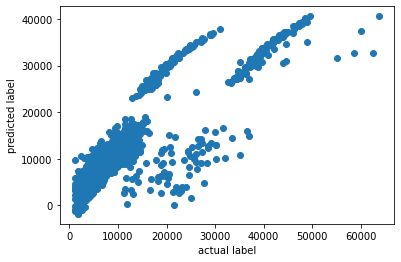

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel('actual label')
plt.ylabel('predicted label')

**Check the Test Set**

In [24]:
y_pred_test = lr.predict(x_test)
print(f"Y_Actual:{y_test[:5].values.flatten()}")
print(f"Y_Pred  :{y_pred_test[:5].flatten()}")

Y_Actual:[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525 ]
Y_Pred  :[11017.23047857  9787.53016777 37994.78211844 16122.77840727
  6930.7592301 ]


*Check the Relationship*

Text(0, 0.5, 'predicted label')

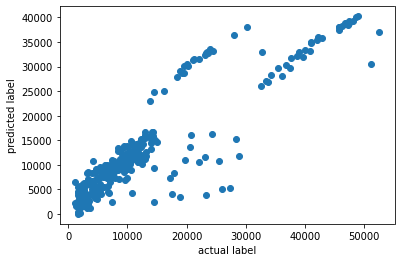

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test)
plt.xlabel('actual label')
plt.ylabel('predicted label')

**How good the model learn?** To check how good the model learn, we can use `r2_score`. It shows how close the predited value with thye regression line. If the r2_score near to 1, that means - the model is good. and if the r2_score near to 0, that means - the model is bad.

In [29]:
from sklearn.metrics import r2_score

print(f"For Training Set: {r2_score(y_train, y_pred_train)}")
print(f"For Testing Set : {r2_score(y_test, y_pred_test)}")

For Training Set: 0.7368306228430945
For Testing Set : 0.799874714544996
